In [1]:
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')


In [2]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
os.listdir("/content/gdrive/My Drive/test")
#Sometimes you need to run this cell if the cell below gives you an error

['990273ae-21bc-11ea-a13a-137349068a90.jpg',
 '9902843e-21bc-11ea-a13a-137349068a90.jpg',
 '99029af0-21bc-11ea-a13a-137349068a90.jpg',
 '9902ad06-21bc-11ea-a13a-137349068a90.jpg',
 '9902c2e6-21bc-11ea-a13a-137349068a90.jpg',
 '9902cd4a-21bc-11ea-a13a-137349068a90.jpg',
 '9902d074-21bc-11ea-a13a-137349068a90.jpg',
 '9902ddda-21bc-11ea-a13a-137349068a90.jpg',
 '9902eafa-21bc-11ea-a13a-137349068a90.jpg',
 '99032790-21bc-11ea-a13a-137349068a90.jpg',
 '9903350a-21bc-11ea-a13a-137349068a90.jpg',
 '99033ea6-21bc-11ea-a13a-137349068a90.jpg',
 '99035292-21bc-11ea-a13a-137349068a90.jpg',
 '99036bba-21bc-11ea-a13a-137349068a90.jpg',
 '990399c8-21bc-11ea-a13a-137349068a90.jpg',
 '9903a076-21bc-11ea-a13a-137349068a90.jpg',
 '9903a684-21bc-11ea-a13a-137349068a90.jpg',
 '9903a97c-21bc-11ea-a13a-137349068a90.jpg',
 '9903bcaa-21bc-11ea-a13a-137349068a90.jpg',
 '9903c6e6-21bc-11ea-a13a-137349068a90.jpg',
 '9903cd26-21bc-11ea-a13a-137349068a90.jpg',
 '9903ea40-21bc-11ea-a13a-137349068a90.jpg',
 '99040a0c

In [6]:
test_images = os.listdir("/content/gdrive/My Drive/test")
train_images = os.listdir("/content/gdrive/My Drive/Train_15000")

In [16]:
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive1 = GoogleDrive(gauth)
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [19]:
#download = drive1.CreateFile({'id': "1t4Y0KVDrHzFJMkZsHn1YV6MTH6bIs--2"})
#download.GetContentFile("iwildcam2020_train_annotations.json")

#download = drive1.CreateFile({'id': "1EzvWcSdeqsLnFELqTA64t4RpUIvT2fp8"})
#download.GetContentFile("iwildcam2020_megadetector_results.json")

#download = drive1.CreateFile({'id': "1OjaCk8Z9s2GxpamlT2HBCN0d0xXGijdB"})
#download.GetContentFile("iwildcam2020_test_information.json")



InvalidConfigError: ignored

In [20]:
from fastai import *
from fastai.vision import *


In [21]:
print(len(train_images))
print(len(test_images))

15011
62894


In [22]:
with open('iwildcam2020_train_annotations.json') as json_file:
  train_data = json.load(json_file)

In [23]:
train_data

{'annotations': [{'category_id': 73,
   'count': 1,
   'id': 'a292dd3c-21bc-11ea-a13a-137349068a90',
   'image_id': '96b00332-21bc-11ea-a13a-137349068a90'},
  {'category_id': 4,
   'count': 1,
   'id': 'a0afcfc0-21bc-11ea-a13a-137349068a90',
   'image_id': '879d74d8-21bc-11ea-a13a-137349068a90'},
  {'category_id': 227,
   'count': 1,
   'id': 'a306e9c0-21bc-11ea-a13a-137349068a90',
   'image_id': '9017f7aa-21bc-11ea-a13a-137349068a90'},
  {'category_id': 250,
   'count': 1,
   'id': '9eed94c4-21bc-11ea-a13a-137349068a90',
   'image_id': '90d93c58-21bc-11ea-a13a-137349068a90'},
  {'category_id': 2,
   'count': 1,
   'id': 'a2a4dd7a-21bc-11ea-a13a-137349068a90',
   'image_id': '887cd0ec-21bc-11ea-a13a-137349068a90'},
  {'category_id': 233,
   'count': 1,
   'id': '9f159262-21bc-11ea-a13a-137349068a90',
   'image_id': '9137d902-21bc-11ea-a13a-137349068a90'},
  {'category_id': 230,
   'count': 1,
   'id': 'a1b98046-21bc-11ea-a13a-137349068a90',
   'image_id': '9784a768-21bc-11ea-a13a-13734

In [24]:
df_train = pd.DataFrame({'id': [item['id'] for item in train_data['annotations']],
                         'category_id': [item['category_id'] for item in train_data['annotations']],
                         'image_id': [item['image_id'] for item in train_data['annotations']],
                         'location': [item['location'] for item in train_data['images']],
                         'file_name': [item['file_name'] for item in train_data['images']]})

df_train.head()

id  ...                                 file_name
0  a292dd3c-21bc-11ea-a13a-137349068a90  ...  96b00332-21bc-11ea-a13a-137349068a90.jpg
1  a0afcfc0-21bc-11ea-a13a-137349068a90  ...  879d74d8-21bc-11ea-a13a-137349068a90.jpg
2  a306e9c0-21bc-11ea-a13a-137349068a90  ...  9017f7aa-21bc-11ea-a13a-137349068a90.jpg
3  9eed94c4-21bc-11ea-a13a-137349068a90  ...  90d93c58-21bc-11ea-a13a-137349068a90.jpg
4  a2a4dd7a-21bc-11ea-a13a-137349068a90  ...  887cd0ec-21bc-11ea-a13a-137349068a90.jpg

[5 rows x 5 columns]

In [25]:
df_train.shape

(217959, 5)

In [26]:
df_train = df_train[df_train['file_name'].isin(train_images)]

In [27]:
df_train.shape

(15011, 5)

In [28]:
cat_images = dict()
cat_count = dict()

annotations = train_data['annotations']
_images = train_data['images']
for i, annotation in enumerate(annotations):
    _img = annotation['image_id']
    cat = annotation['category_id']
    
    imgs = cat_images.get(cat, None)
    if imgs is None:
        cat_images[cat] = [{'image_id': _img, 'category': cat}]
    else:
        cat_images[cat].append({'image_id': _img, 'category': cat})
        
    count = cat_count.get(cat, 0)
    if count == 0:
        cat_count[cat] = 1
    else:
        cat_count[cat] += 1
        
n_train = dict()
n_val = dict()

for cat, count in cat_count.items():
    _train = math.floor(count * 0.70)
    if _train < 1:
        _train = 1
    _val = count - _train
    n_train[cat] = _train
    n_val[cat] = _val

train_images = []
val_images = []
for cat in cat_images.keys():
    random.shuffle(cat_images[cat])
    train_images += cat_images[cat][:n_train[cat]]
    val_images += cat_images[cat][n_train[cat]:]

val_img_dt = pd.DataFrame(val_images)

In [29]:
df_train['is_valid'] = np.where(df_train.image_id.isin(val_img_dt['image_id']), True, False)


In [30]:
loc_valid = df_train.loc[(df_train['is_valid'] == True)].location.unique()
loc_train = df_train.loc[(df_train['is_valid'] == False)].location.unique()

loc_valid.shape
df_train.category_id.unique().shape

(160,)

In [31]:
df_train.groupby('is_valid').size()

is_valid
False    10460
True      4551
dtype: int64

In [32]:
df_train.drop(df_train.loc[df_train['file_name']=='87022118-21bc-11ea-a13a-137349068a90.jpg'].index, inplace=True)
df_train.drop(df_train.loc[df_train['file_name']=='8792549a-21bc-11ea-a13a-137349068a90.jpg'].index, inplace=True)

In [33]:
df_train.category_id.unique().shape

(160,)

In [34]:
with open(r'iwildcam2020_test_information.json') as f:
    test_data = json.load(f)

In [35]:
test_data['images']

[{'datetime': '2013-08-02 21:44:00.000',
  'file_name': '88037cce-21bc-11ea-a13a-137349068a90.jpg',
  'frame_num': 1,
  'height': 1779,
  'id': '88037cce-21bc-11ea-a13a-137349068a90',
  'location': 84,
  'seq_id': '88037e90-21bc-11ea-a13a-137349068a90',
  'seq_num_frames': 1,
  'width': 2771},
 {'datetime': '2013-08-02 21:51:00.000',
  'file_name': '963e6b46-21bc-11ea-a13a-137349068a90.jpg',
  'frame_num': 1,
  'height': 1779,
  'id': '963e6b46-21bc-11ea-a13a-137349068a90',
  'location': 84,
  'seq_id': '963e6cb8-21bc-11ea-a13a-137349068a90',
  'seq_num_frames': 1,
  'width': 2771},
 {'datetime': '2013-04-25 18:23:00.000',
  'file_name': '8a1b53ba-21bc-11ea-a13a-137349068a90.jpg',
  'frame_num': 1,
  'height': 1865,
  'id': '8a1b53ba-21bc-11ea-a13a-137349068a90',
  'location': 548,
  'seq_id': '8a1b5554-21bc-11ea-a13a-137349068a90',
  'seq_num_frames': 1,
  'width': 2895},
 {'datetime': '2013-04-17 16:10:00.000',
  'file_name': '938c0d5e-21bc-11ea-a13a-137349068a90.jpg',
  'frame_num':

In [36]:
df_test = pd.DataFrame.from_records(test_data['images'])
df_test.head()

seq_num_frames  location  ... height                                 file_name
0               1        84  ...   1779  88037cce-21bc-11ea-a13a-137349068a90.jpg
1               1        84  ...   1779  963e6b46-21bc-11ea-a13a-137349068a90.jpg
2               1       548  ...   1865  8a1b53ba-21bc-11ea-a13a-137349068a90.jpg
3               1       181  ...   1818  938c0d5e-21bc-11ea-a13a-137349068a90.jpg
4               1       181  ...   1841  95b9bd92-21bc-11ea-a13a-137349068a90.jpg

[5 rows x 9 columns]

In [37]:
len(df_test)

62894

In [38]:
df_test = df_test[df_test['file_name'].isin(test_images)]


In [39]:
#!mkdir "256_images"
#from os import path


In [42]:
#test = [ImageList.from_df(df, path = 'content/gdrive/My Drive/', cols='file_name', folder=folder, suffix='') 
#              for df, folder in zip([ df_test], [ 'Train_15000'])]
#test
#test = [ImageList.from_df(df, path = '', cols='file_name', folder=folder, suffix='') for df, folder in zip([ df_train], [ 'Train_15000'])]
#list(zip([ df_train], [ 'Train_15000']))
#list(zip([ df_test], [ '/content/gdrive/My Drive/test']))
#df_train
#test = [ImageList.from_df(df, path = '/content/gdrive/My Drive/', cols='file_name', folder=folder, suffix='') 
#              for df, folder in zip([ df_test], [ 'test'])]
#train = [ImageList.from_df(df, path = '/content/gdrive/My Drive/', cols='file_name', folder=folder, suffix='') 
#              for df, folder in zip([ df_train], [ 'Train_15000'])]


In [43]:
#train, test = [ImageList.from_df(df, path='../input/iwildcam2020-256/256_images/', cols='file_name', folder=folder, suffix='') 
#               for df, folder in zip([df_train, df_test], ['train/images', 'test/images'])]
train = [ImageList.from_df(df, path = '/content/gdrive/My Drive/', cols='file_name', folder=folder, suffix='') 
              for df, folder in zip([ df_train], [ 'Train_15000'])]
train = train[0]

test = [ImageList.from_df(df, path = '/content/gdrive/My Drive/', cols='file_name', folder=folder, suffix='') 
              for df, folder in zip([ df_test], [ 'test'])]
test = test[0]
trfm = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.)
src = (train.use_partial_data(1)
        .split_from_df(col='is_valid')
        .label_from_df(cols='category_id')
        .add_test(test))
data = (src.transform(trfm, size = 128, padding_mode = 'reflection')
        .databunch(path=Path('.'), bs = 32).normalize(imagenet_stats))
## Changed batch size to 32 from 256
#data = (src.transform(size = 32, padding_mode = 'reflection').databunch(path=Path('.'), bs = 64).normalize(imagenet_stats))



In [44]:
train

ImageList (15011 items)
Image (3, 1206, 1874),Image (3, 1826, 2895),Image (3, 1841, 2802),Image (3, 1826, 2879),Image (3, 1841, 2864)
Path: /content/gdrive/My Drive

In [45]:
org_classes = pd.DataFrame({"org_category": data.classes})
org_classes['Category'] = org_classes.index

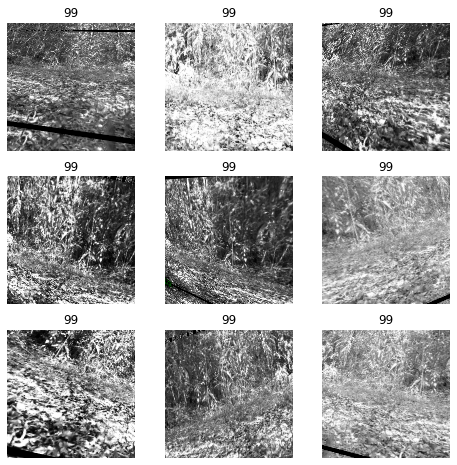

In [46]:
def _plot(i,j,ax):
    x,y = data.train_ds[1]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

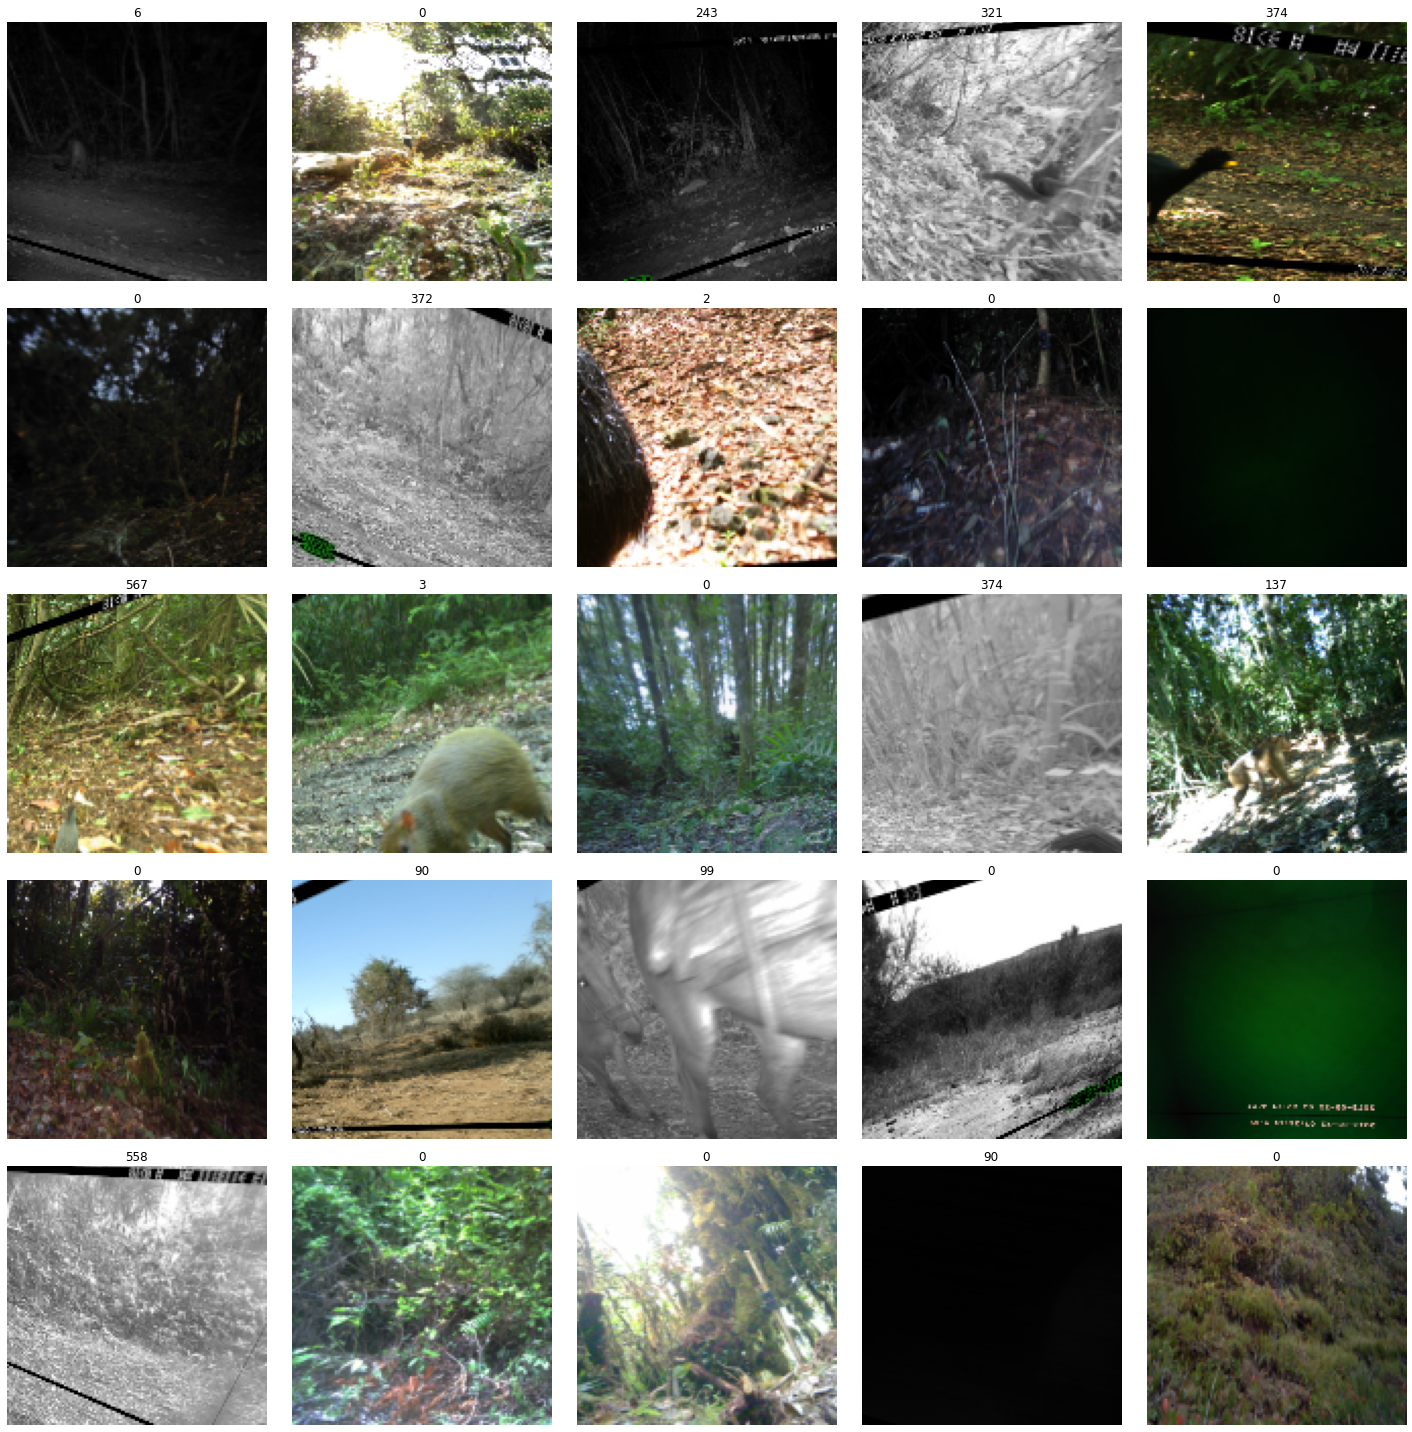

In [47]:
data.show_batch()

In [48]:
data.c

149

In [49]:
learn = cnn_learner(data, base_arch=models.resnet50, metrics=accuracy).mixup()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [50]:
#torch.cuda.empty_cache()
#print(torch.cuda.memory_summary(device=None, abbreviated=False))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-03
Min loss divided by 10: 6.92E-03
CPU times: user 6.29 s, sys: 1.33 s, total: 7.61 s
Wall time: 5min 49s


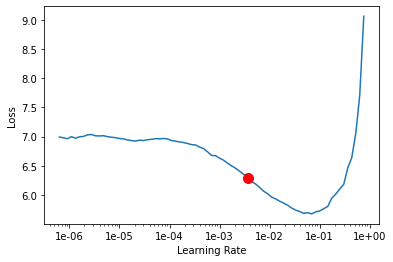

In [51]:
%%time
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [52]:
learn.recorder.min_grad_lr

0.00363078054770101

In [53]:
%%time
learn.fit_one_cycle(cyc_len =5, max_lr = slice(0.01))

CPU times: user 1min 51s, sys: 9.98 s, total: 2min 1s
Wall time: 51min 17s


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-06
Min loss divided by 10: 1.58E-07
CPU times: user 6.12 s, sys: 857 ms, total: 6.97 s
Wall time: 1min 25s


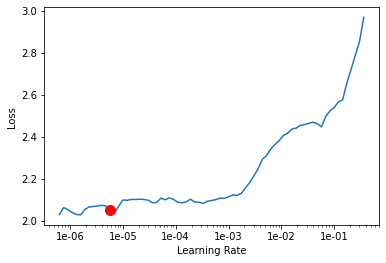

In [54]:
%%time
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [55]:
%%time
learn.fit_one_cycle(5, slice(1e-5, 1e-4))

CPU times: user 2min 9s, sys: 12.7 s, total: 2min 22s
Wall time: 35min 24s


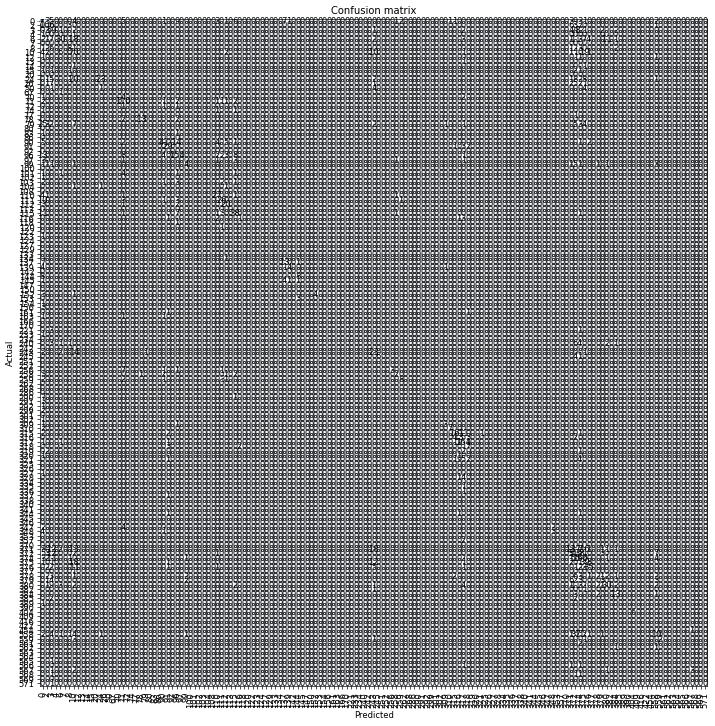

In [56]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [58]:
while True:pass


KeyboardInterrupt: ignored

In [59]:
%%time
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
preds,y = learn.TTA(ds_type=DatasetType.Test)

CPU times: user 11min 25s, sys: 1min 7s, total: 12min 32s
Wall time: 13h 51min 22s


In [63]:
pred_csv = pd.DataFrame(preds.numpy())
pred_csv['Id'] = learn.data.test_ds.items
pred_csv.to_csv("outout_preds.csv", index = False)


In [69]:
submission = pd.read_csv('sample_submission.csv')
id_list = list(submission.Id)
pred_list = list(np.argmax(preds.numpy(), axis=1))
pred_dict = dict((key, value.item()) for (key, value) in zip(learn.data.test_ds.items,pred_list))
pred_ordered = [pred_dict['/content/gdrive/My Drive/test/' + id + '.jpg'] for id in id_list]
submission_with_idx = pd.DataFrame({'Id':id_list,'Category':pred_ordered})
submission_fixed_labels = pd.merge(submission_with_idx, org_classes, on = 'Category', how='left')
submission_fixed_labels = submission_fixed_labels.drop(['Category'], axis = 1)
submission_fixed_labels.rename(columns={'org_category': 'Category'}, inplace=True)

submission_fixed_labels.to_csv("submission2.csv".format(Category),index = False)
print("Done")
#pred_dict

Done


In [64]:
test_images

['990273ae-21bc-11ea-a13a-137349068a90.jpg',
 '9902843e-21bc-11ea-a13a-137349068a90.jpg',
 '99029af0-21bc-11ea-a13a-137349068a90.jpg',
 '9902ad06-21bc-11ea-a13a-137349068a90.jpg',
 '9902c2e6-21bc-11ea-a13a-137349068a90.jpg',
 '9902cd4a-21bc-11ea-a13a-137349068a90.jpg',
 '9902d074-21bc-11ea-a13a-137349068a90.jpg',
 '9902ddda-21bc-11ea-a13a-137349068a90.jpg',
 '9902eafa-21bc-11ea-a13a-137349068a90.jpg',
 '99032790-21bc-11ea-a13a-137349068a90.jpg',
 '9903350a-21bc-11ea-a13a-137349068a90.jpg',
 '99033ea6-21bc-11ea-a13a-137349068a90.jpg',
 '99035292-21bc-11ea-a13a-137349068a90.jpg',
 '99036bba-21bc-11ea-a13a-137349068a90.jpg',
 '990399c8-21bc-11ea-a13a-137349068a90.jpg',
 '9903a076-21bc-11ea-a13a-137349068a90.jpg',
 '9903a684-21bc-11ea-a13a-137349068a90.jpg',
 '9903a97c-21bc-11ea-a13a-137349068a90.jpg',
 '9903bcaa-21bc-11ea-a13a-137349068a90.jpg',
 '9903c6e6-21bc-11ea-a13a-137349068a90.jpg',
 '9903cd26-21bc-11ea-a13a-137349068a90.jpg',
 '9903ea40-21bc-11ea-a13a-137349068a90.jpg',
 '99040a0c

In [ ]:
print('Finished bitch')